# Sakila Database Analysis

In [7]:
from dotenv import load_dotenv
import os

# Load the text file containing the environment variables
load_dotenv(".env")

# Retrieve and assign variables to the environment variables
username = os.getenv("USER_NAME")
password = os.getenv("PASSWORD")
host = os.getenv("HOST")
database_name = os.getenv("DATABASE_NAME")

In [8]:
import sqlalchemy as sa
import pandas as pd

# Create an engine to connect to MySQL
connection = sa.create_engine(f'mysql://{username}:{password}@{host}/{database_name}')

In [9]:
sql_querry = """
            SHOW tables
             """
tables = pd.read_sql(sql_querry, connection)

In [10]:
tables

,Tables_in_sakila
0,actor
1,actor_info
2,address
3,category
4,city
5,country
6,customer
7,customer_list
8,film
9,film_actor


In [11]:
# 1. Determine how much was made from active and inactive members. Visualise the result as a bar chart

sql_querry1 = """
            SELECT active AS members_status, SUM(amount) AS revenue
            FROM customer AS c
            JOIN payment AS p ON p.customer_id = c.customer_id
            GROUP BY active
             """
q1_df = pd.read_sql(sql_querry1, connection)

<Figure size 1000x500 with 0 Axes>

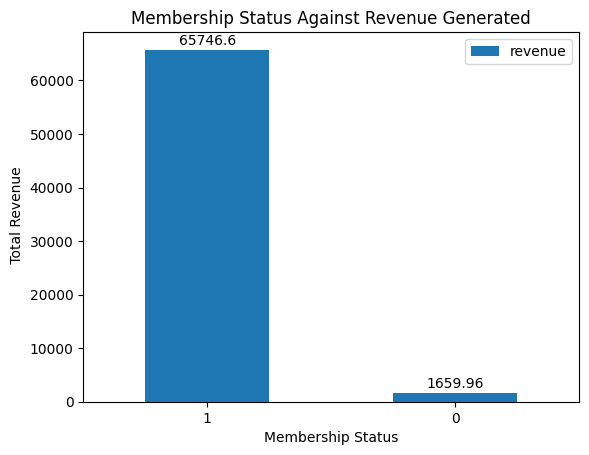

In [13]:
import matplotlib.pyplot as plt

# Visualise result as bar chart
plt.figure(figsize = (10, 5))
(
   q1_df
    .plot
    .bar(
        x = "members_status",
        y = "revenue",
        title = "Membership Status Against Revenue Generated",
        xlabel = "Membership Status",
        ylabel = " Total Revenue",
        rot = 0
    )
    
)
# Show data points on each bars
for i, v in enumerate(q1_df["revenue"]):
    plt.text(i, v+1000, str(v), ha = "center", weight = 10)
plt.show()

In [15]:
# 2. Determine the staff member that contributed the most to the revenue in August 2005. Visualise their percentage contribution as a pie chart.

sql_querry2 = """
            SELECT CONCAT(first_name, " ", last_name) AS full_name, SUM(amount) AS revenue, MONTHNAME(payment_date) AS month, YEAR(payment_date) AS year
            FROM payment AS p
            JOIN staff AS s ON s.staff_id = p.staff_id
            WHERE MONTHNAME(payment_date) = "August" AND YEAR(payment_date) = "2005"
            GROUP BY full_name, month, year
            ORDER BY revenue DESC
              """
q2_df = pd.read_sql(sql_querry2, connection)

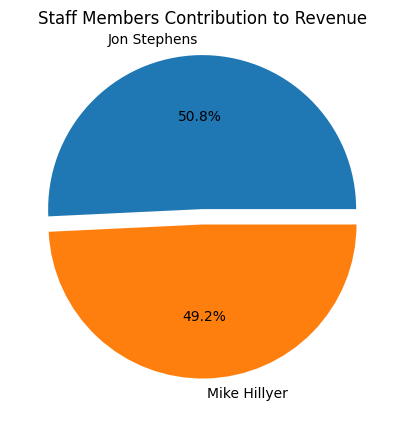

In [16]:
# Visualise results as pie chart

plt.figure(figsize = (10,5), dpi = 100)
plt.pie(data = q2_df, x = "revenue", labels = ["Jon Stephens","Mike Hillyer"], autopct = "%1.1f%%", explode = [0.1,0])
plt.title("Staff Members Contribution to Revenue")
plt.show()

In [17]:
# 3. Create a line chart showing the monthly rental count of the store

sql_querry3 = """
            SELECT*
            FROM rental
             """
q3_df = pd.read_sql(sql_querry3, connection)

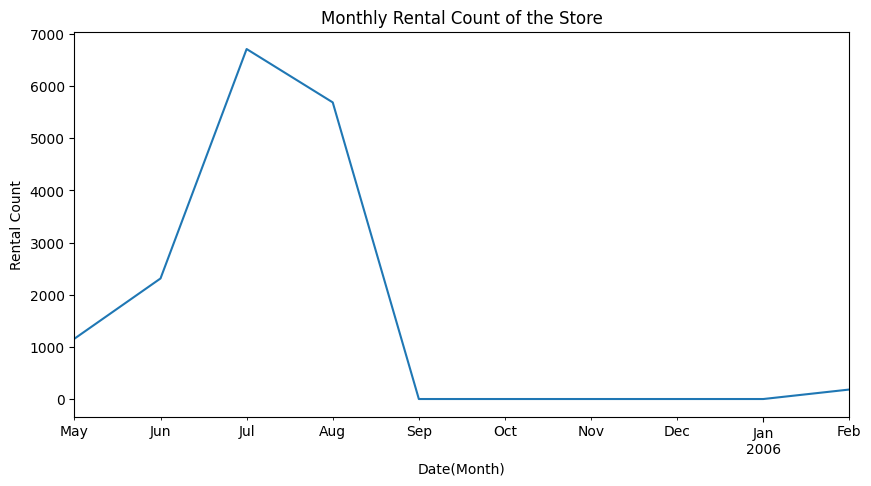

In [25]:
# Set plot resolution to 600 dot per inch (dpi = 600)
plt.figure(figsize = (10, 5))

(
    q3_df
    # Set rental date as index
    .set_index("rental_date")
    # sort index in ascending order
    .sort_index(ascending = True)
    # Resample by month
    .resample("ME")
    # Select column
    ["rental_id"]
    # Apply aggregation
    .count()
    # Visualise result
    .plot(title = "Monthly Rental Count of the Store", xlabel = "Date(Month)", ylabel = "Rental Count")
)
plt.show()

In [20]:
# 4. Create a basic chart to show the monthly revenue for the rental store

sql_querry4 = """
            SELECT*
            FROM payment
              """
q4_df = pd.read_sql(sql_querry4, connection)

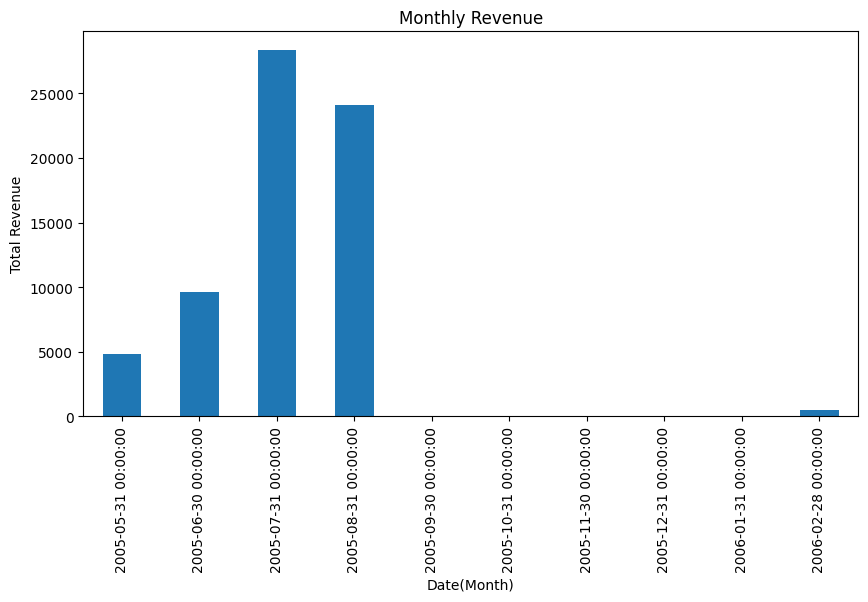

There were no records for rentals captured for the last 5 months in the year 2005


In [24]:
# Set plot resolution to 600 dot per inch (dpi = 600)
plt.figure(figsize = (10, 5))

(
    q4_df
    # Set payment date as index
    .set_index("payment_date")
    # Sort index in ascending order
    .sort_index(ascending = True)
    # Resample by month
    .resample("ME")
    # select a column
    ["amount"]
    # Apply aggregation
    .sum()
    # Visualise as bar chart
    .plot.bar(figsize = (10,5), title = "Monthly Revenue", xlabel = "Date(Month)", ylabel = "Total Revenue")
)
plt.show()
print(f'There were no records for rentals captured for the last 5 months in the year 2005')